In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd 
import numpy as np 
import datetime
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV, train_test_split

def MAPE(y_true, y_pred): 
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / np.maximum(np.ones(len(y_true)), np.abs(y_true))))*100

In [ ]:
def Seq(data, n_step):
    _X, _y = list(), list()
    if len(data)-1>n_step:
        for i in range(len(data)):
            end_ix = i + n_step
            if end_ix > len(data)-1:
                break
            seq_x = data[i:end_ix]
            seq_y = data[end_ix]

            _X.append(seq_x)
            _y.append(seq_y)
    return np.array(_X), np.array(_y)

In [ ]:
df = pd.read_csv('drive/MyDrive/TA/NewData1.csv')
df

,va,vb,vc,vab,vbc,vca,ia,ib,ic,pa,...,sb,sc,st,pfa,pfb,pfc,freq,ep,eq,datetime
0,238.7,239.4,238.7,0,0,0,17.7,0.0,0.0,2.88,...,0.60,0.50,3.98,0.69,0.63,2.05,50.0,0,0,2021-05-02 02:08:27
1,238.9,239.7,238.9,0,0,0,15.3,0.0,0.0,2.53,...,0.54,0.50,3.29,0.71,0.36,1.57,50.0,0,0,2021-05-02 02:13:27
2,239.1,239.9,239.0,0,0,0,14.4,0.0,0.0,2.49,...,0.50,0.47,3.08,0.75,0.12,1.33,50.0,0,0,2021-05-02 02:18:27
3,239.0,240.0,238.9,0,0,0,13.2,0.0,0.0,2.32,...,0.50,0.75,3.05,0.75,0.12,1.00,50.0,0,0,2021-05-02 02:23:27
4,238.7,239.6,238.7,0,0,0,15.0,0.0,0.0,2.53,...,0.72,0.45,3.50,0.71,0.63,1.48,50.0,0,0,2021-05-02 02:28:27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,240.0,241.1,240.1,0,0,0,3.2,1.5,0.0,0.55,...,0.30,0.22,0.83,0.75,0.28,0.11,50.0,0,0,2021-10-05 07:43:27
44996,239.5,240.6,239.7,0,0,0,3.3,1.6,0.0,0.53,...,0.32,0.14,0.71,0.70,0.28,0.12,50.0,0,0,2021-10-05 07:48:27
44997,239.9,240.9,239.9,0,0,0,3.4,0.0,0.0,0.55,...,0.19,0.13,0.70,0.70,0.13,0.27,50.0,0,0,2021-10-05 07:53:27
44998,240.1,241.2,240.2,0,0,0,3.6,0.0,0.0,0.64,...,0.21,0.14,0.78,0.77,0.22,0.21,50.0,0,0,2021-10-05 07:58:27


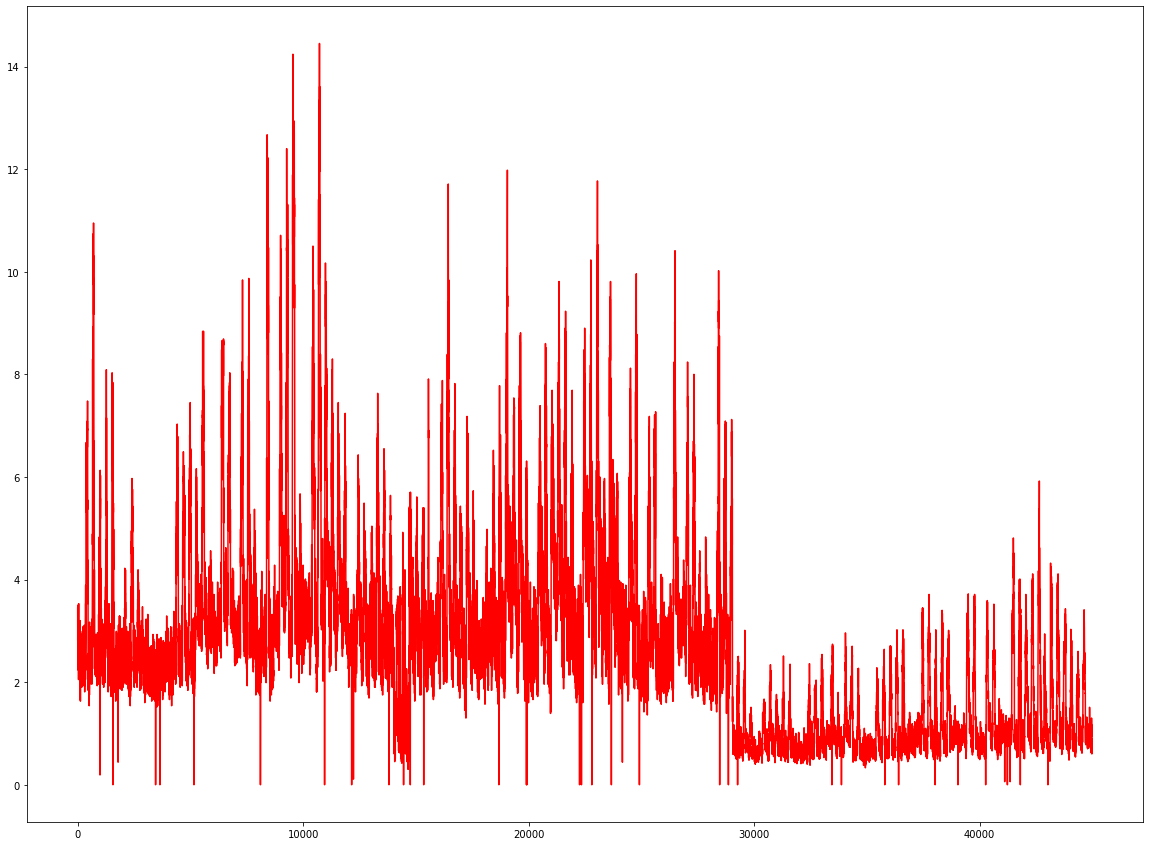

In [ ]:
plt.figure(figsize=(20,15))
plt.plot(df.pt, 'r')
plt.show()

In [ ]:
data = df[['pt', 'datetime']]
new_data = []
new_data = {
    'pt':[],
    'datetime':[]
}


for i in range (0,len(data.pt),12):
    new_data['pt'].append(np.mean(data.pt[i:i+12]))
    new_data['datetime'].append(datetime.datetime.strptime(data.datetime[i], '%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d %H:%M:%S'))
new_data = pd.DataFrame.from_dict(new_data)
new_data

,pt,datetime
0,2.997500,2021-05-02 02:08:27
1,2.727500,2021-05-02 03:08:27
2,2.719167,2021-05-02 04:08:27
3,2.880000,2021-05-02 05:08:27
4,2.695833,2021-05-02 06:08:27
...,...,...
3745,0.810000,2021-10-05 03:08:27
3746,0.788333,2021-10-05 04:08:27
3747,1.103333,2021-10-05 05:08:27
3748,0.736667,2021-10-05 06:08:27


In [ ]:
new_data.loc[(new_data.datetime == '2021-08-10 07:08:27')]

,pt,datetime
2405,2.021667,2021-08-10 07:08:27


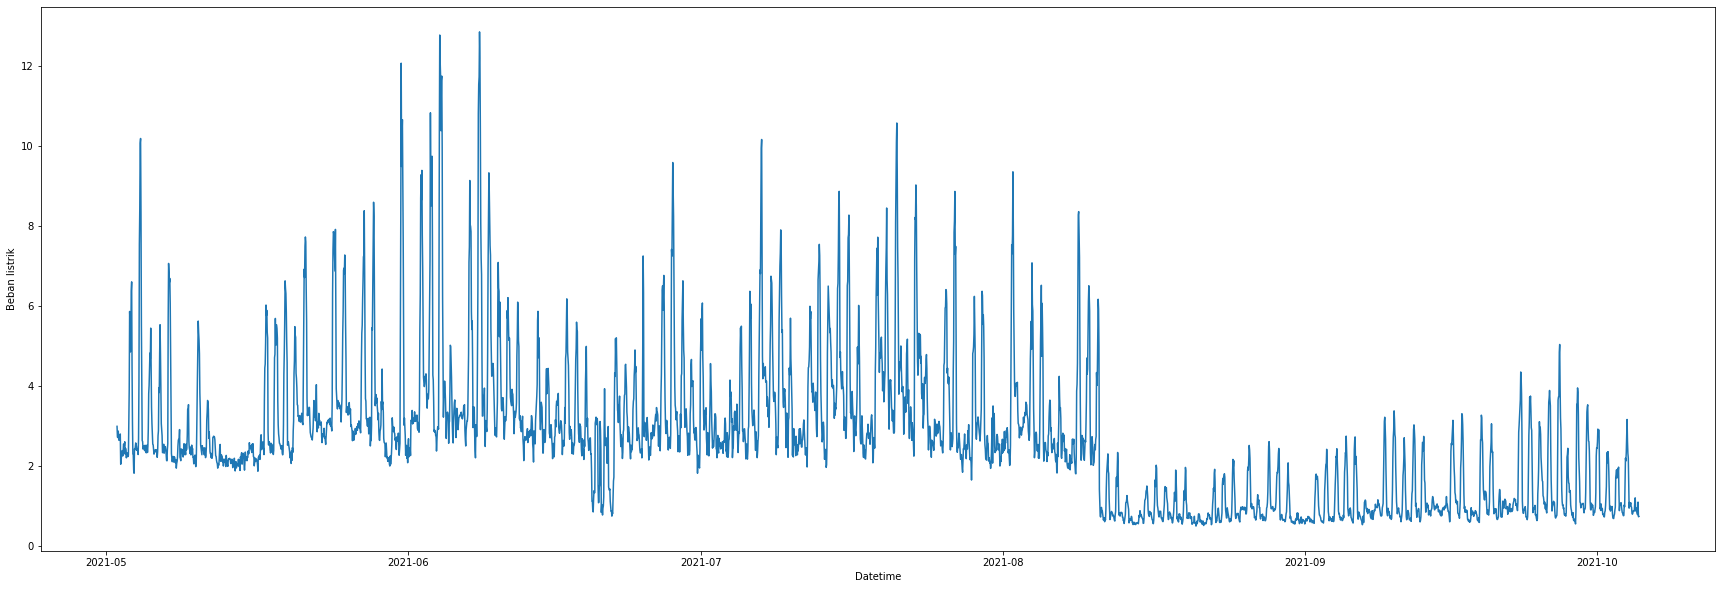

In [ ]:
plt.figure(figsize = (30,10))
plt.plot(pd.to_datetime(new_data.datetime[:]), new_data.pt[:])
plt.xlabel('Datetime')
plt.ylabel('Beban listrik')
plt.show()

In [ ]:
new_data[2405:].to_csv('out.csv',index=False)
# np.mean(new_data.pt)

In [ ]:
model = []
model = SVR()

In [ ]:
X, y = Seq(data=new_data.pt, n_step=24)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, shuffle=False)

In [ ]:
C = [.5, 1., 1.5, 2, 2.5]
epsilon = [.1, .2, .3, .4, .5, .6, .7,]
gamma = ['auto','scale', .01, .1, 1, 10]

parameter = {
    'kernel':['linear','rbf'],
    'C':C, 
    'gamma':gamma,
    'epsilon':epsilon
}

In [ ]:
parameter

{'C': [0.5, 1.0, 1.5, 2, 2.5],
 'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
 'gamma': ['auto', 'scale', 0.01, 0.1, 1, 10],
 'kernel': ['linear', 'rbf']}

In [ ]:
GridSearch = GridSearchCV(model, parameter, scoring='neg_mean_squared_error')
GridSearch.fit(X_train, y_train)
GridSearch.best_params_

{'C': 2.5, 'epsilon': 0.2, 'gamma': 'auto', 'kernel': 'linear'}

In [ ]:
GridSearch.score(X_test, y_test)

-0.07583413858190335

##Pengaruh Kernel##

In [ ]:
model = []
model = SVR()

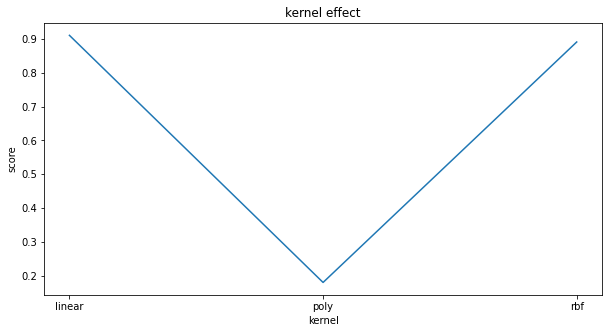

In [ ]:
kernel = ['linear', 'poly', 'rbf']
scores = []
for k in kernel:
  model.set_params(kernel=k)
  model.fit(X_train, y_train)
  scores.append(model.score(X_test, y_test))
plt.figure(figsize = (10,5))
plt.plot(kernel, scores)
plt.title("kernel effect")
plt.xlabel("kernel")
plt.ylabel("score")
plt.show()

In [ ]:
pd.DataFrame(data = {'score':scores, 'kernel':kernel}).sort_values(by=['score'])

,score,kernel
1,0.179493,poly
2,0.891040,rbf
0,0.910688,linear


##Pengaruh Nilai Epsilon##

In [ ]:
model = []
model = SVR(kernel='linear')

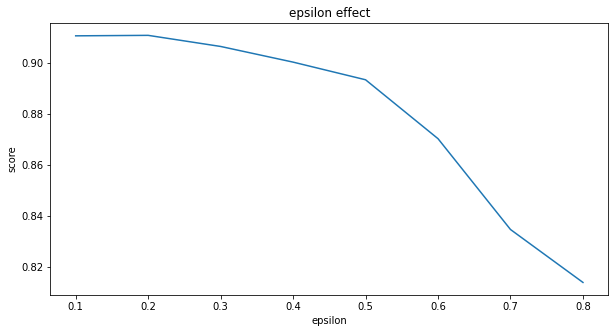

In [ ]:
epsilon = [.1, .2, .3, .4, .5, .6, .7, .8]
scores = []
for e in epsilon:
  model.set_params(epsilon=e)
  model.fit(X_train, y_train)
  scores.append(model.score(X_test, y_test))
plt.figure(figsize=(10,5))
plt.plot(epsilon, scores)
plt.title("epsilon effect")
plt.xlabel("epsilon")
plt.ylabel("score")
plt.show()

In [ ]:
pd.DataFrame(data = {'score':scores, 'epsilon':epsilon}).sort_values(by=['score'])

,score,epsilon
7,0.813809,0.8
6,0.834607,0.7
5,0.870280,0.6
4,0.893425,0.5
3,0.900360,0.4
2,0.906512,0.3
0,0.910688,0.1
1,0.910875,0.2


##Pengaruh nilai C##

In [ ]:
model = []
model = SVR(epsilon=.2, kernel='linear')

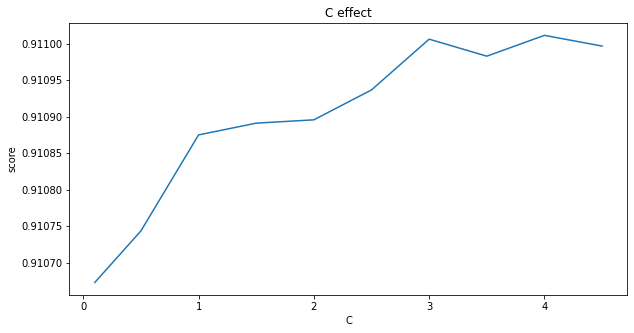

In [ ]:

C = [.1, .5, 1., 1.5, 2, 2.5, 3, 3.5, 4, 4.5]
scores = []
for c in C:
  model.set_params(C=c)
  model.fit(X_train, y_train)
  scores.append(model.score(X_test, y_test))
plt.figure(figsize=(10, 5))
plt.plot(C, scores)
plt.title("C effect")
plt.xlabel("C")
plt.ylabel("score")
plt.show()

In [ ]:
pd.DataFrame(data = {'score':scores, 'C':C}).sort_values(by=['score'])

,score,C
0,0.910673,0.1
1,0.910744,0.5
2,0.910875,1.0
3,0.910891,1.5
4,0.910896,2.0
5,0.910937,2.5
7,0.910983,3.5
9,0.910997,4.5
6,0.911006,3.0
8,0.911011,4.0


##Pengaruh Gamma##

In [ ]:
model = []
model = SVR(epsilon=.2, kernel='linear', C=4)

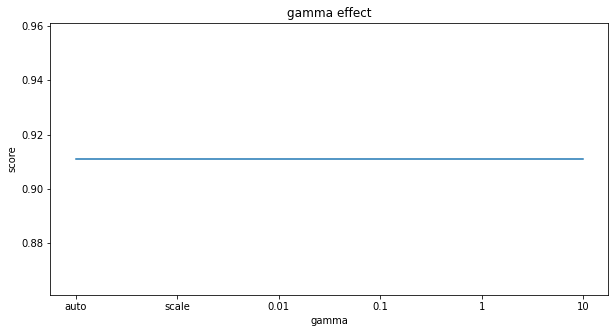

In [ ]:
gamma = ['auto','scale', .01, .1, 1, 10]
scores = []
for g in gamma:
  model.set_params(gamma=g)
  model.fit(X_train, y_train)
  scores.append(model.score(X_test, y_test))
plt.figure(figsize=(10, 5))
plt.plot(gamma, scores)
plt.title("gamma effect")
plt.xlabel("gamma")
plt.ylabel("score")
plt.show()

In [ ]:
pd.DataFrame(data = {'score':scores, 'gamma':gamma}).sort_values(by=['score'])

,score,gamma
0,0.911011,auto
1,0.911011,scale
2,0.911011,0.01
3,0.911011,0.1
4,0.911011,1
5,0.911011,10


##Uji##

In [ ]:
X_date,y_date = Seq(data = new_data.datetime, n_step=24)
X_train_date, X_test_date, y_train_date, y_test_date = train_test_split(X_date, y_date, test_size=.1, shuffle=False)


In [ ]:
model1, model2 = [], []
model1 = SVR(C = 2.5, kernel='linear', epsilon=.2)
model2 = SVR(C = 4, kernel='linear', epsilon=.2)

In [ ]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

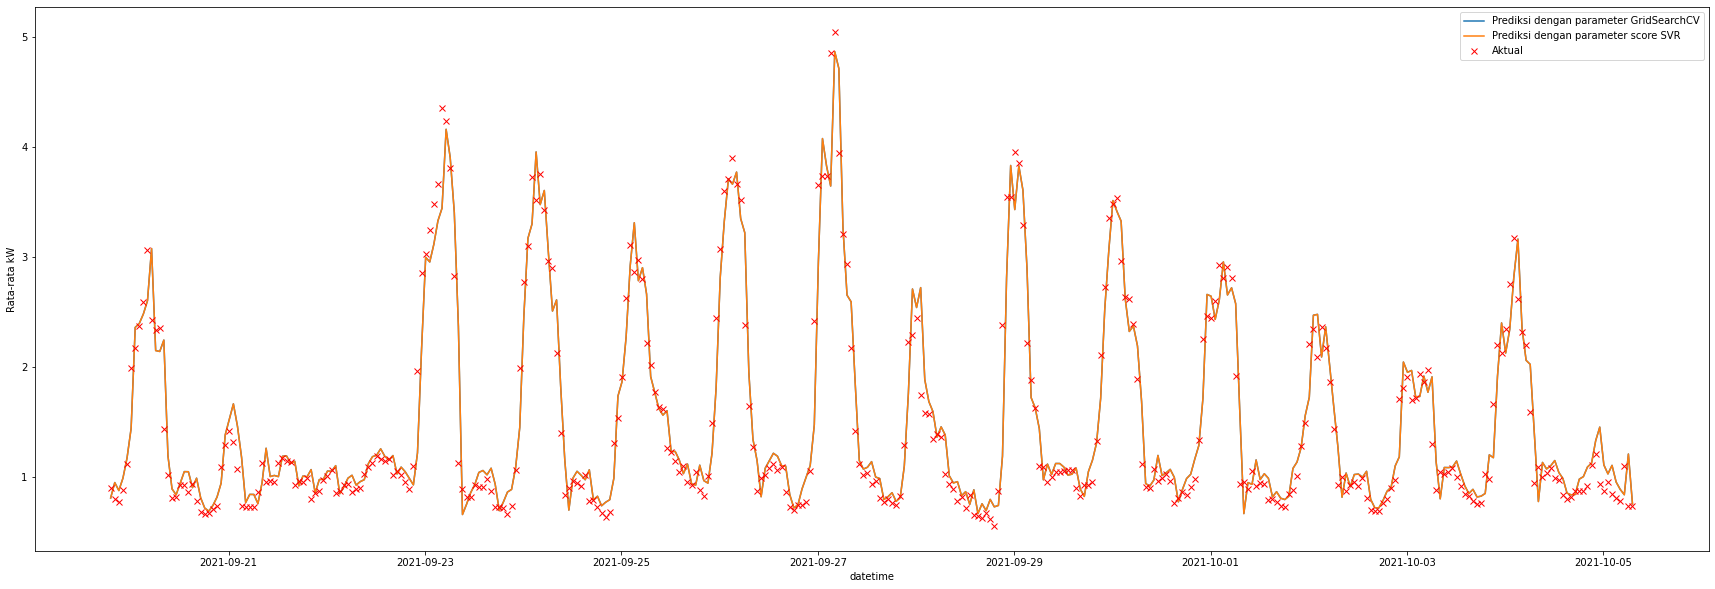

MAPE = 12.290814796775335
MSE = 0.07583413858190335
MAPE = 12.266327547182652
MSE = 0.07577054368162986


In [ ]:
plt.figure(figsize=(30,10))
plt.plot(pd.to_datetime(y_test_date), y_pred1, label='Prediksi dengan parameter GridSearchCV')
plt.plot(pd.to_datetime(y_test_date), y_pred2, label='Prediksi dengan parameter score SVR')
plt.plot(pd.to_datetime(y_test_date),y_test, 'rx',label='Aktual')
plt.legend()
plt.xlabel('datetime')
plt.ylabel('Rata-rata kW')
plt.show()
print(f'MAPE = {MAPE(y_test, y_pred1)}')
print(f'MSE = {MSE(y_test, y_pred1)}')
print(f'MAPE = {MAPE(y_test, y_pred2)}')
print(f'MSE = {MSE(y_test, y_pred2)}')

In [ ]:
pd.DataFrame(data={'aktual':y_test, 'prediksi':y_pred1})

,aktual,prediksi
0,0.905000,0.813236
1,0.799167,0.952926
2,0.778333,0.880638
3,0.889167,0.992931
4,1.118333,1.175455
...,...,...
368,0.810000,0.958227
369,0.788333,0.891061
370,1.103333,0.842527
371,0.736667,1.211971


#Tidak terpakai#

In [ ]:
model = []
model = SVR(C = 4, kernel='rbf', epsilon=.1, gamma='auto')
model

SVR(C=4, gamma='auto')

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

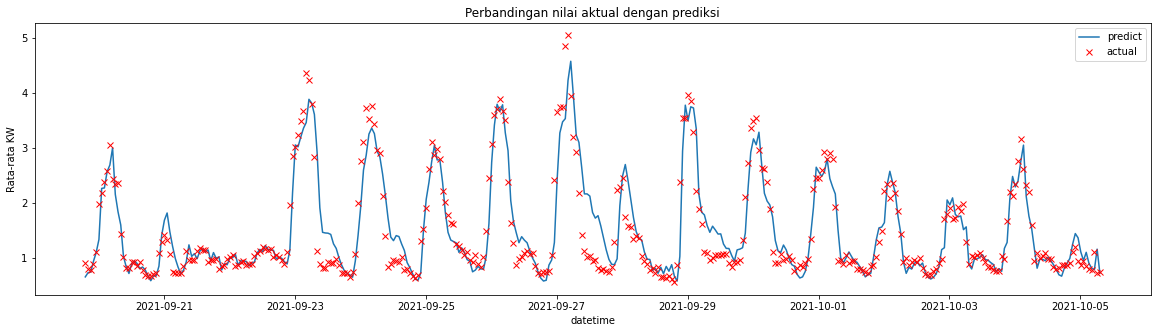

MAPE = 17.578111096062205
MSE= 0.14407161276154903


In [ ]:
plt.figure(figsize=(20,5))
plt.plot(pd.to_datetime(y_test_date), y_pred, label='predict')
plt.plot(pd.to_datetime(y_test_date),y_test, 'rx',label='actual')
plt.legend()
plt.xlabel('datetime')
plt.ylabel('Rata-rata KW')
plt.title('Perbandingan nilai aktual dengan prediksi')
plt.show()
print(f'MAPE = {MAPE(y_test, y_pred)}')
print(f'MSE= {MSE(y_test, y_pred)}')

In [ ]:
pd.DataFrame(data={'datetime':y_test_date,'aktual':y_test, 'prediksi':y_pred})

##Prediksi Data Baru##

In [ ]:
_X, _y = Seq(new_data.pt, n_step=24)

In [ ]:
model = []
model = SVR(C = 4, kernel='rbf', epsilon=.1, gamma='auto')
model

In [ ]:
model.fit(_X, _y)

In [ ]:
_last_data, _pred_data, _last_date, _pred_date = [],[],[],[]
_last_data = new_data.pt[len(new_data.pt)-24:].to_numpy()
_pred_data = model.predict([_last_data])

In [ ]:
_pred_data = [
              _last_data[len(_last_data)-1],
              _pred_data[0]
]

In [ ]:
_last_date = new_data.datetime[len(new_data.datetime)-24:].to_numpy()
time_change = datetime.timedelta(hours=1)
_pred_date = [
              _last_date[len(_last_date)-1],
              dt.strftime((dt.strptime(_last_date[len(_last_date)-1], '%Y-%m-%d %H:%M:%S')+time_change), format='%Y-%m-%d %H:%M:%S')
]

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(pd.to_datetime(_last_date), _last_data, label = 'data trakhir')
plt.plot(pd.to_datetime(_pred_date), _pred_data, label = 'prediksi data selanjutnya')
plt.legend()
plt.xlabel('datetime')
plt.ylabel('Rata-rata KW')
plt.title('Prediksi rata-rata beban 1 jam berikutnya')
plt.show()

In [ ]:
pd.DataFrame(data = {'datetime':_pred_date, 'predict':_pred_data})

In [ ]:
import pickle
filename = 'filename.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
len(X_test[0])

In [ ]:
x=[0.98, 0.9799999999999999, 0.9383333333333331, 0.9349999999999999, 0.9816666666666668, 1.0366666666666664, 0.9299999999999998, 0.9083333333333332, 0.8983333333333333, 0.93, 0.9083333333333335, 0.8700000000000001, 0.8583333333333334, 0.8183333333333334, 0.8916666666666666, 0.8133333333333334, 0.8766666666666666, 0.8250000000000001, 1.0133333333333332, 1.175, 1.3399999999999999, 1.42, 1.3266666666666664, 1.5116666666666667]
model.predict([x])

In [ ]:
import sklearn
sklearn.__version__